In [3]:
#we use Box-Cox to normalise the skewness of the dataset to make it more Gaussian likely
import pandas as pd
import json
from scipy import stats

biz_file = open('Datasets\yelp_academic_dataset_business.json', encoding = "utf-8")
df= pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [4]:
#input data should alwasy eb positive

df['review_count'].min()

5

In [8]:
#apparently keeping lambda = 0 for log transform
rc_log = stats.boxcox(df['review_count'], lmbda = 0) #for log

rc_bc, bc_param = stats.boxcox(df['review_count'])
print(f"Lambda is :{bc_param}")
df['rc_log'] = rc_log
df['rc_bc'] = rc_bc

Lambda is :-0.34662847518561846


Text(0, 0.5, 'occurance')

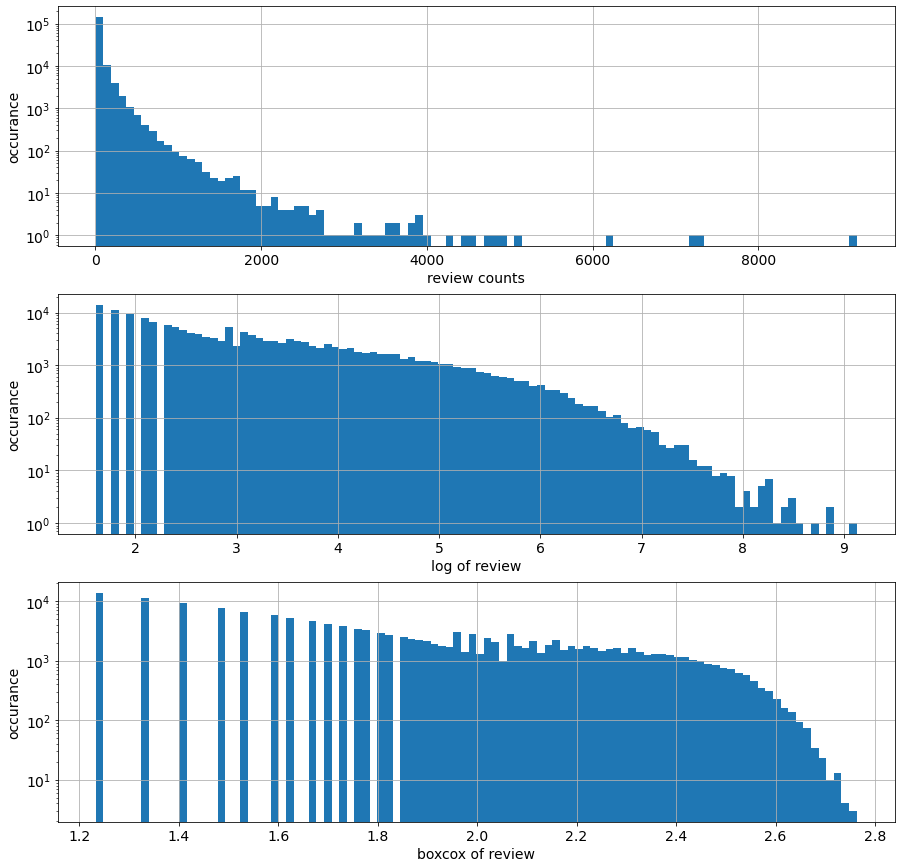

In [18]:
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(15)
df['review_count'].hist(ax = ax1, bins = 100)
ax1.tick_params(labelsize = 14)
ax1.set_yscale("log")
ax1.set_xlabel("review counts", fontsize = 14)
ax1.set_ylabel("occurance", fontsize = 14)

df['rc_log'].hist(ax= ax2, bins = 100)
ax2.tick_params(labelsize = 14)
ax2.set_yscale("log")
ax2.set_xlabel("log of review", fontsize = 14)
ax2.set_ylabel("occurance", fontsize = 14)

df['rc_bc'].hist(ax= ax3, bins = 100)
ax3.tick_params(labelsize = 14)
ax3.set_yscale("log")
ax3.set_xlabel("boxcox of review", fontsize = 14)
ax3.set_ylabel("occurance", fontsize = 14)


In [12]:
df['rc_log']

0         4.454347
1         4.836282
2         2.564949
3         2.079442
4         2.639057
            ...   
160580    2.079442
160581    2.890372
160582    2.079442
160583    2.302585
160584    4.406719
Name: rc_log, Length: 160585, dtype: float64

Text(0, 0.5, 'occurance')

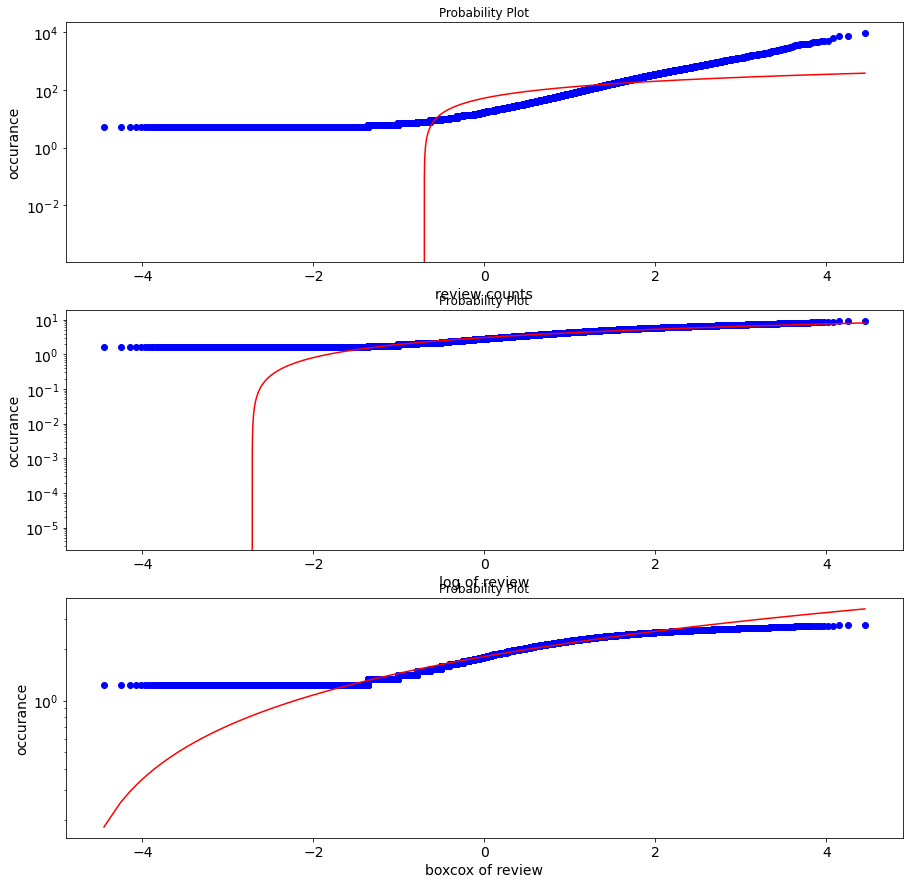

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(15)
stats.probplot(df['review_count'],dist = stats.norm,plot= ax1)
ax1.tick_params(labelsize = 14)
ax1.set_yscale("log")
ax1.set_xlabel("review counts", fontsize = 14)
ax1.set_ylabel("occurance", fontsize = 14)

stats.probplot(df['rc_log'],dist = stats.norm,plot= ax2)
ax2.tick_params(labelsize = 14)
ax2.set_yscale("log")
ax2.set_xlabel("log of review", fontsize = 14)
ax2.set_ylabel("occurance", fontsize = 14)

stats.probplot(df['rc_bc'],dist = stats.norm,plot= ax3)
ax3.tick_params(labelsize = 14)
ax3.set_yscale("log")
ax3.set_xlabel("boxcox of review", fontsize = 14)
ax3.set_ylabel("occurance", fontsize = 14)